# Using the python Zip() function 

In [16]:
a = ['a','b','c']
b = ['x','y','z']
for item in range(0,3):
    print(a[item],b[item])

a x
b y
c z


In [17]:
a = ['a','b','c']
for item in a:
    print(item)

a
b
c


In [18]:
a = ['a','b','c']
b = ['x','y','z']

for item1, item2 in zip(a,b):
    print(item1,item2)


a x
b y
c z


# Gradient Descent Algorithm 

In [19]:
# necessary library imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets generate some dummy data to process. We create a numpy array of 10 floating point numbers between -2 and 10 to serve as input feature. We use $y= 2 + 1.25 x$ to generate the output variable y. 

In [20]:
# generate data
X = np.linspace(-2, 10, 10)
y = 2 + X * 1.25

In [21]:
y

array([-0.5       ,  1.16666667,  2.83333333,  4.5       ,  6.16666667,
        7.83333333,  9.5       , 11.16666667, 12.83333333, 14.5       ])

Text(0, 0.5, '$f(x) = 2 + 1.25 x $')

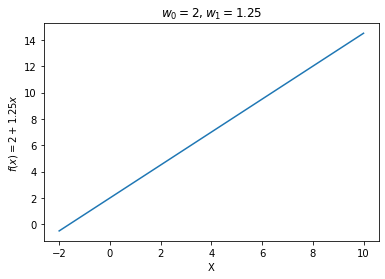

In [22]:
plt.plot(X, y)
plt.title(r'$w_0 = 2, w_1=1.25$')
plt.xlabel(r'X')
plt.ylabel(r'$f(x) = 2 + 1.25 x $')

Lets define a function for the hypothesis i.e. $h(x; w_0,w_1)=w_0+w_1 x$

In [23]:
# hypothesis
def h(x, w0, w1):
    return w0 + w1 * x

## Stochastic gradient descent

In [24]:
# Stochastic gradient descent

# initialize the parameters to zero
w0 = 0.0
w1 = 0.0


# the learning rate. Experiement by changing alpha to see its impact on training.
alpha = 0.05

d = []  # an array to store the states for generating plot 
delta = 0  # a variable to store the error.

# change here to reduce or increase the 
# number of iterations (epochs)
for i in range(1, 50):

    print('Iteration: {} \t w0:{:0f} \t w1:{:0f} \t J:{:0f}'.format(
        i, w0, w1, delta**2))
    print('='*70)

    # zip is used to iterate over two iterable variables simultaneously
    for x_i, y_i in zip(X, y):

        # calculate the error i.e. diffrecne between estimated and acutal values
        delta = h(x_i, w0, w1) - y_i
        w0 = w0 - alpha * delta       # update w_0
        w1 = w1 - alpha * delta * x_i  # updtae w_1
        # print('='*70)
    d.append(delta)

Iteration: 1 	 w0:0.000000 	 w1:0.000000 	 J:0.000000
Iteration: 2 	 w0:0.765014 	 w1:2.694747 	 J:10.642866
Iteration: 3 	 w0:0.803627 	 w1:1.050436 	 J:0.621181
Iteration: 4 	 w0:1.153974 	 w1:1.844254 	 J:1.583566
Iteration: 5 	 w0:1.257816 	 w1:1.308058 	 J:0.001592
Iteration: 6 	 w0:1.439570 	 w1:1.529086 	 J:0.303296
Iteration: 7 	 w0:1.530777 	 w1:1.344882 	 J:0.014023
Iteration: 8 	 w0:1.634300 	 w1:1.397792 	 J:0.075417
Iteration: 9 	 w0:1.700533 	 w1:1.328817 	 J:0.014561
Iteration: 10 	 w0:1.763029 	 w1:1.335330 	 J:0.023159
Iteration: 11 	 w0:1.807990 	 w1:1.306213 	 J:0.008352
Iteration: 12 	 w0:1.846950 	 w1:1.301914 	 J:0.008171
Iteration: 13 	 w0:1.876614 	 w1:1.287880 	 J:0.003977
Iteration: 14 	 w0:1.901306 	 w1:1.282495 	 J:0.003121
Iteration: 15 	 w0:1.920627 	 w1:1.274911 	 J:0.001756
Iteration: 16 	 w0:1.936405 	 w1:1.270636 	 J:0.001243
Iteration: 17 	 w0:1.948914 	 w1:1.266201 	 J:0.000750
Iteration: 18 	 w0:1.959036 	 w1:1.263199 	 J:0.000505
Iteration: 19 	 w0

As you can see after a few iterations the cost function converges to 0 and the estimated values of the parameters $w_0$ and $w_1$ approach their actual values. The following plot shows how error reduces as the training progresses. 

Text(0, 0.5, 'Error: $h(x)-y$')

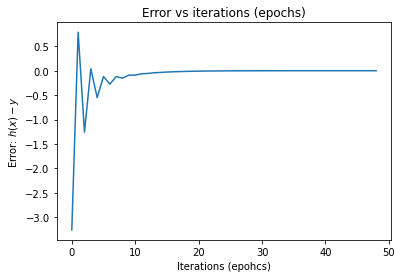

In [25]:
plt.plot(d)
plt.title("Error vs iterations (epochs)")
plt.xlabel("Iterations (epohcs)")
plt.ylabel(r"Error: $h(x)-y$")

# Batch gradient descent

Lets implement the batch version of the algorithm. 

In [26]:
# batch gradient descent

w0 = 0
w1 = 0
alpha = 0.05

for i in range(1, 150):
    print('Batch Iteration: {} \t w0:{:0f} \t w1:{:0f}'.format(i, w0, w1))
    delta = np.array([])
    for x_i, y_i in zip(X, y):
        ypred = h(x_i, w0, w1)
        delta = np.append(delta, ypred-y_i)
        # print(delta)
    w0 = w0 - alpha * sum(delta)/len(delta)
    w1 = w1 - alpha * sum(delta * X)/len(delta)

Batch Iteration: 1 	 w0:0.000000 	 w1:0.000000
Batch Iteration: 2 	 w0:0.350000 	 w1:2.316667
Batch Iteration: 3 	 w0:0.219167 	 w1:1.011111
Batch Iteration: 4 	 w0:0.355986 	 w1:1.733574
Batch Iteration: 5 	 w0:0.341472 	 w1:1.320897
Batch Iteration: 6 	 w0:0.410219 	 w1:1.543894
Batch Iteration: 7 	 w0:0.430929 	 w1:1.411213
Batch Iteration: 8 	 w0:0.477140 	 w1:1.477834
Batch Iteration: 9 	 w0:0.507716 	 w1:1.433060
Batch Iteration: 10 	 w0:0.545719 	 w1:1.450824
Batch Iteration: 11 	 w0:0.578268 	 w1:1.433750
Batch Iteration: 12 	 w0:0.612604 	 w1:1.436347
Batch Iteration: 13 	 w0:0.644705 	 w1:1.428094
Batch Iteration: 14 	 w0:0.676851 	 w1:1.426075
Batch Iteration: 15 	 w0:0.707793 	 w1:1.420723
Batch Iteration: 16 	 w0:0.738259 	 w1:1.417389
Batch Iteration: 17 	 w0:0.767868 	 w1:1.413074
Batch Iteration: 18 	 w0:0.796860 	 w1:1.409454
Batch Iteration: 19 	 w0:0.825126 	 w1:1.405586
Batch Iteration: 20 	 w0:0.852753 	 w1:1.401995
Batch Iteration: 21 	 w0:0.879716 	 w1:1.398385
B

As you can see the batch algorithm converges slowly and requires more iterations despite that we have used the same value for the learning rate $\alpha = 0.05$.

# ASSIGNMENT

Experiment with the following values of alpha and write the values of $w_0$ and $w_1$ after 10, 25 and 50 iterations for each algorithm (i.e. stochastic and Batch gradient descent):

0.05, 0.1, 0.5

Report your results in two tables, one for each parameter.